In [1]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Učitavanje podataka
df = pd.read_csv('../resources/clean_extended_data.csv')

### Izbacivanje Nepotrebnih Kolona
Pre nego što izvršite selekciju karakteristika, trebalo bi da uklonite sve kolone koje nisu relevantne za predviđanje. Ovo uključuje identifikacione kolone (kao što su ID igrača, ime, tim), kolone koje su procurile informacije o ciljnoj varijabli, ili bilo koje kategoričke kolone koje ne planirate da koristite.



In [3]:
# Primer uklanjanja kolona koje nisu potrebne
columns_to_drop = ['IDfg', 'Name', 'Team', 'Season']
df_cleaned = df.drop(columns=columns_to_drop)

# Uklanjanje bilo koje kategoričke kolone koja nije već pretvorena u numerički format
df_cleaned = df_cleaned.select_dtypes(include=[np.number])


In [4]:
X = df_cleaned.drop('H', axis=1)  # Ciljna varijabla 'H' se izbacuje iz skupa karakteristika
y = df_cleaned['H']

# Deljenje podataka na trening i test skupove
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
print(X_train.dtypes)

Age                   int64
G                     int64
AB                    int64
PA                    int64
1B                    int64
                     ...   
L-WAR               float64
competitive_runs    float64
bolts               float64
hp_to_1b            float64
sprint_speed        float64
Length: 258, dtype: object


In [6]:
# Brojanje NaN vrednosti po kolonama
nan_counts = X_train.isna().sum()

# Prikaz kolona koje imaju više od 0 NaN vrednosti
nan_columns = nan_counts[nan_counts > 0]
print(nan_columns)



Series([], dtype: int64)


In [7]:
X_train

,Age,G,AB,PA,1B,2B,3B,HR,R,RBI,...,HardHit,HardHit%,Events,CStr%,CSW%,L-WAR,competitive_runs,bolts,hp_to_1b,sprint_speed
128,31,155,584,645,128,27,5,15,86,49,...,171,0.352,486,0.150,0.239,4.2,257.0,37.0,4.25,28.700000
340,28,149,492,566,75,25,0,35,80,108,...,153,0.426,359,0.183,0.307,3.1,130.0,0.0,4.42,27.028361
1592,29,26,63,74,11,3,1,0,8,1,...,11,0.229,48,0.205,0.320,0.2,25.0,0.0,4.42,27.200000
596,26,139,524,550,125,21,2,12,62,51,...,89,0.185,480,0.129,0.208,1.9,253.0,0.0,4.33,26.900000
993,31,69,230,263,28,14,0,9,35,30,...,66,0.349,189,0.150,0.216,1.1,78.0,0.0,4.50,26.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,34,149,544,636,99,20,1,22,96,78,...,156,0.373,418,0.181,0.270,0.5,212.0,0.0,4.44,26.200000
1095,30,31,65,70,12,2,1,2,7,7,...,14,0.368,38,0.200,0.367,0.9,130.0,0.0,4.42,27.028361
1130,37,123,343,403,46,22,2,13,60,38,...,82,0.343,239,0.207,0.306,0.8,99.0,0.0,4.30,26.800000
1294,27,125,415,458,46,17,0,14,50,42,...,91,0.326,279,0.183,0.294,0.6,122.0,0.0,4.45,27.400000


In [8]:
selector = SelectKBest(f_classif, k='all')  # 'all' možete zameniti sa željenim brojem karakteristika
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)

# Otkrijte koje su karakteristike odabrane
selected_features = X_train.columns[selector.get_support()]
print("Odabrane karakteristike:", selected_features)


Odabrane karakteristike: Index(['Age', 'G', 'AB', 'PA', '1B', '2B', '3B', 'HR', 'R', 'RBI',
       ...
       'HardHit', 'HardHit%', 'Events', 'CStr%', 'CSW%', 'L-WAR',
       'competitive_runs', 'bolts', 'hp_to_1b', 'sprint_speed'],
      dtype='object', length=258)


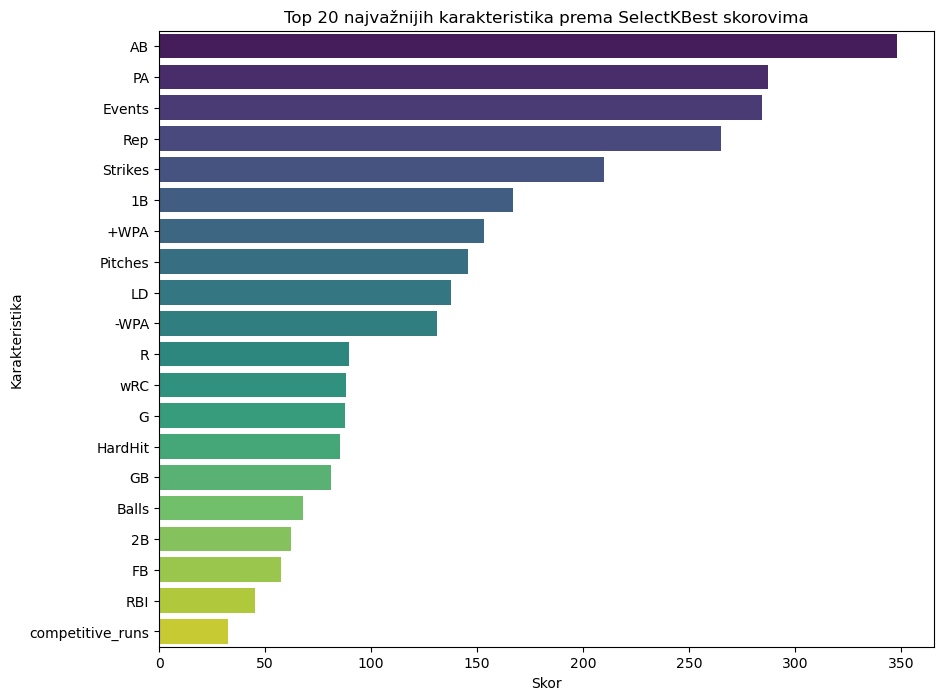

In [9]:
# Dobijanje skorova za svaku karakteristiku
feature_scores = selector.scores_

# Kreiranje DataFrame-a za lakšu vizualizaciju
features_scores_df = pd.DataFrame({'Feature': X_train.columns, 'Score': feature_scores})

# Sortiranje karakteristika prema skorovima
features_scores_df = features_scores_df.sort_values(by='Score', ascending=False)

# Prikaz top N karakteristika
top_n = 20
top_features_scores_df = features_scores_df.head(top_n)

# Vizualizacija
plt.figure(figsize=(10, 8))
sns.barplot(x='Score', y='Feature', data=top_features_scores_df, palette='viridis')
plt.title(f'Top {top_n} najvažnijih karakteristika prema SelectKBest skorovima')
plt.xlabel('Skor')
plt.ylabel('Karakteristika')

plt.show()

In [10]:
# prikazi prvih 50 najkorisnijih karakteristika i stavi ih u dataframe
top_n = 50
top_features_scores_df = features_scores_df.head(top_n)
top_features_scores_df


,Feature,Score
2,AB,348.126687
3,PA,287.065676
250,Events,284.137795
51,Rep,265.160577
26,Strikes,209.679705
4,1B,166.661726
59,+WPA,153.222660
24,Pitches,145.551873
22,LD,137.589906
58,-WPA,131.068067


In [11]:
# Definišite karakteristike koje treba izbaciti
features_to_exclude = ['AB', 'PA', '1B', '2B', '3B', 'HR', 'AVG', 'SLG', 'OBP','AVG+','SLG+','wFA/C','wRC', 'wOBA','G','Lg','OBP+','wRC+','OPS','wFA/C','wFB/C','wFA/C (sc)']

# Filtriranje DataFrame-a da izbaci navedene karakteristike
filtered_features_scores_df = top_features_scores_df[~top_features_scores_df['Feature'].isin(features_to_exclude)]

# Možete dodati dodatne karakteristike u listu features_to_exclude
# ako identifikujete druge koje direktno zavise od broja hitova ili ih uključuju u proračun


In [12]:
top_features = filtered_features_scores_df['Feature'].values  # Ažurirajte ovo prema vašem kodu

results = []

n_iterations = 20
n_features = 10

for _ in range(n_iterations):
    # Nasumičan izbor 10 karakteristika
    selected_features = np.random.choice(top_features, size=n_features, replace=False)
    
    # Priprema podataka koristeći samo izabrane karakteristike
    X_selected = X[selected_features]
    X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
    
    # Obuka Random Forest Regresora
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    # Evaluacija modela
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Čuvanje rezultata
    results.append({
        'Selected_Features': ', '.join(selected_features),
        'R2_Score': r2,
        'MSE': mse,
        'RMSE': rmse
    })

# Kreiranje DataFrame-a iz rezultata
results_df = pd.DataFrame(results)

# Sortiranje rezultata prema R2 skoru (ili po MSE/RMSE)
sorted_results_df = results_df.sort_values(by='R2_Score', ascending=False)

# Prikaz najboljih rezultata
print(sorted_results_df.head())

                                   Selected_Features  R2_Score        MSE  \
4  SO, CSW%, LD, Events, wRAA, Barrels, RBI, IFFB...  0.986827  35.741068   
9   wRAA, Events, BB, GB, +WPA, WAR, IFFB, FB, R, LD  0.986536  36.531997   
5  +WPA, Barrels, R, Off, LD, Pitches, IFH, Strik...  0.985523  39.279802   
1  GB, -WPA, Strikes, L-WAR, REW, IFFB, competiti...  0.984655  41.634344   
7  Events, WPA/LI, SF, LD, BB, Pitches, HardHit, ...  0.984505  42.042738   

       RMSE  
4  5.978383  
9  6.044170  
5  6.267360  
1  6.452468  
7  6.484037  


In [ ]:
# Make list  included columns SO, CSW%, LD, Events, wRAA, Barrels, RBI, IFFB, R, competitive_runs, 
feature_list = ['SO', 'CSW%', 'LD', 'Events', 'wRAA', 'Barrels', 'RBI', 'IFFB', 'R', 'competitive_runs']



